<b> In this notebook, i start to tabulate who are the common actors who appear with each other. I also investigate West Papua and why it is producing results that are out of the ordinary </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataframe
df = pd.read_csv("C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/CSV Files/Result from Investigating West Papua.csv")

# Import SQL stuff

import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
df.to_sql('df', con=engine)

# Investigating West Papua

The Data underneath is the result of this query

SELECT DISTINCT ActionGeo_FullName, ActionGeo_CountryCode, ActionGeo_ADM1Code, ActionGeo_ADM2Code
FROM `gdelt-bq.gdeltv2.events`
WHERE ActionGeo_FullName LIKE '%Manokwari%' OR ActionGeo_FullName LIKE '%Sorong%' OR ActionGeo_FullName like '%sorong%'

In [2]:
df.head()

,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code
0,"Manokwari, Indonesia (general), Indonesia",ID,ID00,18585
1,"Sorong, Irian Jaya Barat, Indonesia",ID,ID39,18585
2,"Osorongai, Rift Valley, Kenya",KE,KE08,18585


From this result, we can see that both the largest cities in West Papua and the capital appear in the GDELT. They both appear underneath Indonesia itself and not West Papua. 

In [3]:
pd.set_option('display.max_colwidth', -1)

query = """
SELECT ActionGeo_FullName, ActionGeo_CountryCode, ActionGeo_ADM1Code, ActionGeo_ADM2Code
FROM df
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_FullName','ActionGeo_CountryCode','ActionGeo_ADM1Code','ActionGeo_ADM2Code'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
# Show the top 20 results
df2.head(20)

C:\Users\dlili\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code
0,"Manokwari, Indonesia (general), Indonesia",ID,ID00,18585
1,"Sorong, Irian Jaya Barat, Indonesia",ID,ID39,18585
2,"Osorongai, Rift Valley, Kenya",KE,KE08,18585


The next thing i did was to try to figure out if those ADM1Codes covered areas outside of Oceania or not. 

In [4]:
# Load in the new result
df = pd.read_csv("C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/CSV Files/Results from ADM1 codes West Papua.csv")
engine = create_engine('sqlite://', echo=False)
df.to_sql('df', con=engine)

In [5]:
# Show some results
df.head(20)

,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code
0,"Tenayan, Indonesia (general), Indonesia",ID,ID00,18585.0
1,"Puah, Indonesia (general), Indonesia",ID,ID00,18585.0
2,"Punan, Indonesia (general), Indonesia",ID,ID00,18585.0
3,"Salau, Indonesia (general), Indonesia",ID,ID00,18585.0
4,"Kanesan, Indonesia (general), Indonesia",ID,ID00,18585.0
5,"Tambelan, Indonesia (general), Indonesia",ID,ID00,18585.0
6,"Nafar, Indonesia (general), Indonesia",ID,ID00,18585.0
7,"Namatota, Indonesia (general), Indonesia",ID,ID00,18585.0
8,"Jarai, Indonesia (general), Indonesia",ID,ID00,18585.0
9,"Sangasanga, Indonesia (general), Indonesia",ID,ID00,18585.0


The picture below shows the location of Tenayan, Indonesia
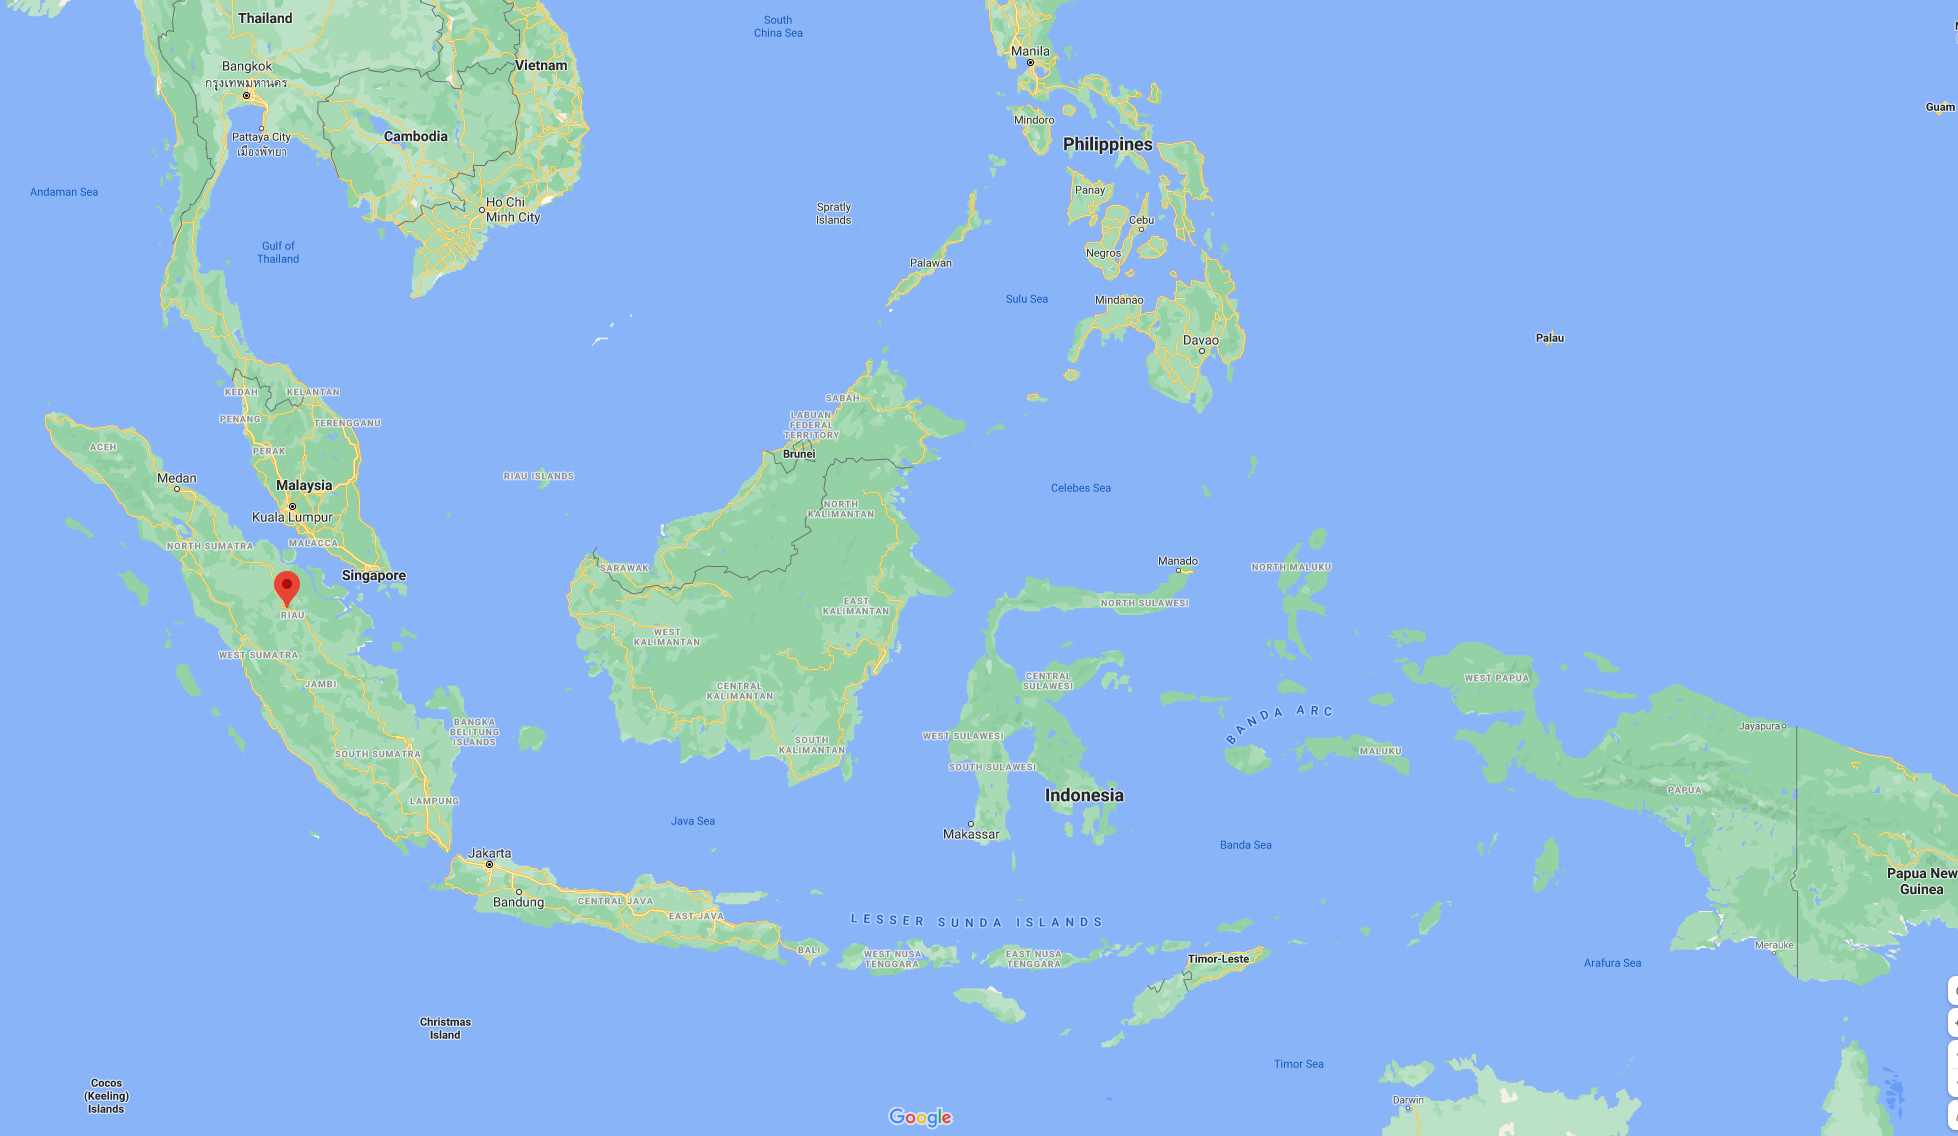
This shows us that the ActionGeo_ADM1Code of ID00 would capture areas outside of Oceania

In [6]:
# This shows us all the locations under ID39 which is where Sorong (West Papua's largest city) is labeled under.
df[['ActionGeo_FullName','ActionGeo_CountryCode','ActionGeo_ADM1Code']][df['ActionGeo_ADM1Code'] == 'ID39']

,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code
119,"Sansapor, Irian Jaya Barat, Indonesia",ID,ID39
192,"Sissi, Irian Jaya Barat, Indonesia",ID,ID39
204,"Waigeo Island, Irian Jaya Barat, Indonesia",ID,ID39
208,"Oransbari, Irian Jaya Barat, Indonesia",ID,ID39
211,"Teminabuan, Irian Jaya Barat, Indonesia",ID,ID39
243,"Ransiki, Irian Jaya Barat, Indonesia",ID,ID39
247,"Fafanlap, Irian Jaya Barat, Indonesia",ID,ID39
254,"Muturi, Irian Jaya Barat, Indonesia",ID,ID39
296,"Benina, Irian Jaya Barat, Indonesia",ID,ID39
359,"Nubul, Irian Jaya Barat, Indonesia",ID,ID39


This image shows where the city of the first result (Sansapor, Irian Jaya Barat, Indonesia) on the last result dataset is located
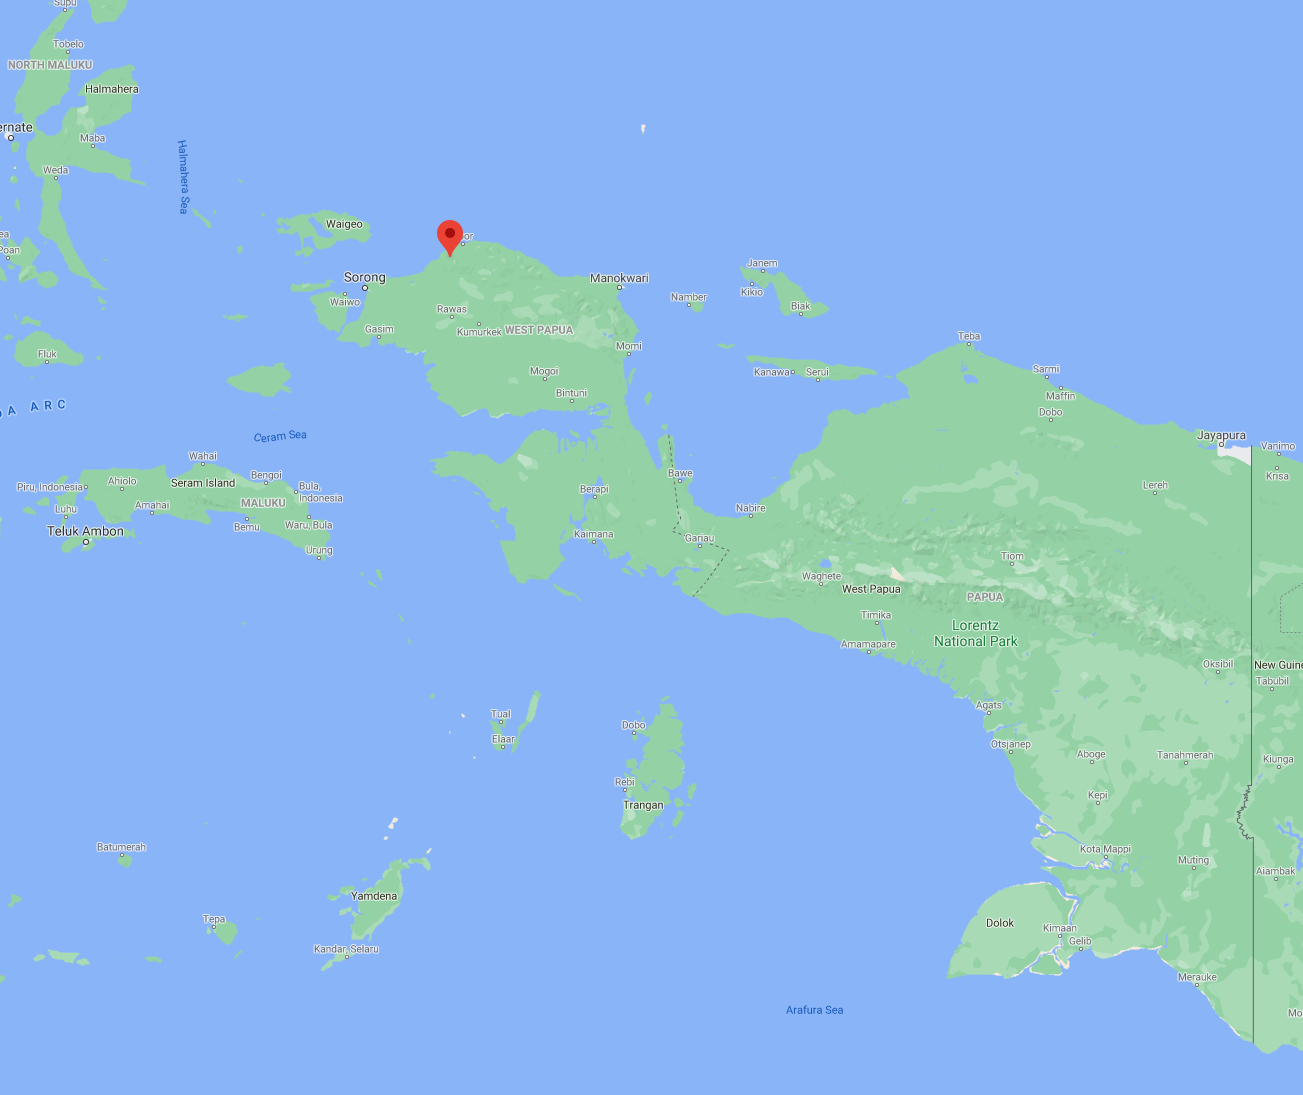

This is the second result on the dataset (Sissi, Irian Jaya Barat, Indonesia)
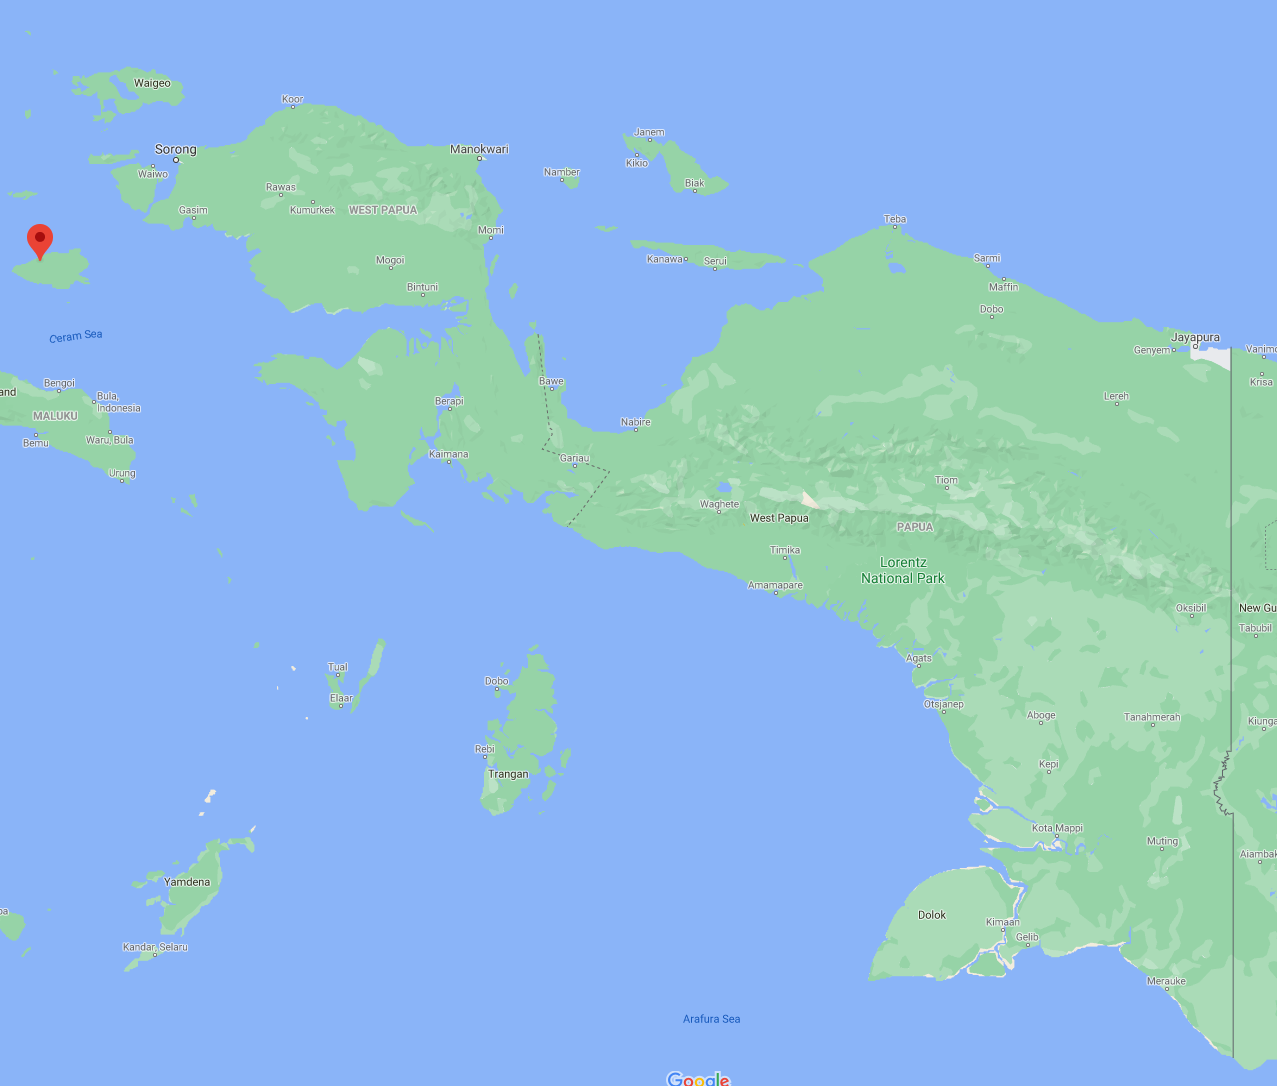

From these results, i believe that if we modify our searches to replace ID30 with ID39, then we will finally include all Oceania regions

# New Events and Eventmentions data

This is the query to pull all the data from the Events table

SELECT 
  GLOBALEVENTID, SQLDATE, MonthYear, Actor1Name, Actor1CountryCode, Actor2Name, Actor2CountryCode, EventCode, GoldsteinScale, NumMentions, NumSources, NumArticles, AvgTone, Actor1Geo_FullName, Actor1Geo_CountryCode, Actor2Geo_FullName, Actor2Geo_CountryCode ,ActionGeo_FullName, ActionGeo_ADM1Code, ActionGeo_ADM2Code, SOURCEURL
FROM 
  `gdelt-bq.gdeltv2.events` 
WHERE 
  ActionGeo_ADM1Code like 'FM%' -- Micronesia
  OR ActionGeo_ADM1Code like 'FJ%' -- Fiji
  OR ActionGeo_ADM1Code like 'KR%' -- Kiribati
  OR ActionGeo_ADM1Code like 'RM%' -- Marshall Islands
  OR ActionGeo_ADM1Code like 'NR%' -- Nauru
  OR ActionGeo_ADM1Code like 'PS%' -- Palau
  OR ActionGeo_ADM1Code like 'PP%' -- Papua New Guinea
  OR ActionGeo_ADM1Code like 'WS%' -- Samoa
  OR ActionGeo_ADM1Code like 'BP%' -- Solomon Islands
  OR ActionGeo_ADM1Code like 'TN%' -- Tonga
  OR ActionGeo_ADM1Code like 'TV%' -- Tuvalu
  OR ActionGeo_ADM1Code like 'NH%' -- Vanuatu
  OR ActionGeo_ADM1Code like 'CW%' -- Cook Islands
  OR ActionGeo_ADM1Code like 'NE%' -- Niue
  OR ActionGeo_ADM1Code like 'AQ%' -- American Samoa
  OR ActionGeo_FullName = 'Ashmore Reef, Queensland, Australia'
  OR ActionGeo_ADM1Code like 'FQ%' -- Baker Island
  OR ActionGeo_FullName = 'Coral Sea, Oceans (general), Oceans'
  OR ActionGeo_FullName like 'Easter Island, V%'
  OR ActionGeo_FullName = 'Galapagos, Imbabura, Ecuador'
  OR ActionGeo_ADM1Code like 'FP%' -- French Polynesia
  OR ActionGeo_ADM1Code like 'GQ%' -- Guam
  OR ActionGeo_ADM1Code like 'HQ%' -- Howland Island
  OR ActionGeo_ADM1Code like 'DQ%' -- Jarvis Island
  OR ActionGeo_ADM1Code like 'JQ%' -- Johnston Atoll
  OR ActionGeo_ADM1Code like 'KQ%' -- Kingman Reef
  OR ActionGeo_FullName = 'Midway Island, Western Australia, Australia'
  OR ActionGeo_ADM1Code like 'NC%' -- New Caledonia
  OR ActionGeo_ADM1Code like 'NF%' -- Norfold Island
  OR ActionGeo_ADM1Code like 'CQ%' -- Norther Mariana Islands
  OR ActionGeo_FullName = 'Ogasawaramura, Tokyo, Japan'
  OR ActionGeo_ADM1Code like 'LQ%' -- Palmyra Atoll
  OR ActionGeo_ADM1Code = 'ID36' -- Papua, Indonesia
  OR ActionGeo_ADM1Code like 'PC%' -- Pitcairn Islands
  OR ActionGeo_ADM1Code like 'TL%' -- Tokelau
  OR ActionGeo_ADM1Code like 'WQ%' -- Wake Island
  OR ActionGeo_ADM1Code like 'WF%' -- Wallis and Futuna
  OR ActionGeo_ADM1Code = 'ID39' -- West Papua, Indonesia
  OR ActionGeo_FullName = 'Bonin Islands, Tokyo, Japan'

This is the query used to pull the Eventmentions table

SELECT 
  events.GLOBALEVENTID, MentionTimeDate, MentionType, MentionSourceName, MentionIdentifier, Confidence,	MentionDocLen, MentionDocTone
FROM 
  `gdelt-bq.gdeltv2.eventmentions` as eventmentions join `gdelt-bq.gdeltv2.events` as events 
    ON eventmentions.GLOBALEVENTID = events.GLOBALEVENTID 
WHERE 
  ActionGeo_ADM1Code like 'FM%' -- Micronesia
  OR ActionGeo_ADM1Code like 'FJ%' -- Fiji
  OR ActionGeo_ADM1Code like 'KR%' -- Kiribati
  OR ActionGeo_ADM1Code like 'RM%' -- Marshall Islands
  OR ActionGeo_ADM1Code like 'NR%' -- Nauru
  OR ActionGeo_ADM1Code like 'PS%' -- Palau
  OR ActionGeo_ADM1Code like 'PP%' -- Papua New Guinea
  OR ActionGeo_ADM1Code like 'WS%' -- Samoa
  OR ActionGeo_ADM1Code like 'BP%' -- Solomon Islands
  OR ActionGeo_ADM1Code like 'TN%' -- Tonga
  OR ActionGeo_ADM1Code like 'TV%' -- Tuvalu
  OR ActionGeo_ADM1Code like 'NH%' -- Vanuatu
  OR ActionGeo_ADM1Code like 'CW%' -- Cook Islands
  OR ActionGeo_ADM1Code like 'NE%' -- Niue
  OR ActionGeo_ADM1Code like 'AQ%' -- American Samoa
  OR ActionGeo_FullName = 'Ashmore Reef, Queensland, Australia'
  OR ActionGeo_ADM1Code like 'FQ%' -- Baker Island
  OR ActionGeo_FullName = 'Coral Sea, Oceans (general), Oceans'
  OR ActionGeo_FullName like 'Easter Island, V%'
  OR ActionGeo_FullName = 'Galapagos, Imbabura, Ecuador'
  OR ActionGeo_ADM1Code like 'FP%' -- French Polynesia
  OR ActionGeo_ADM1Code like 'GQ%' -- Guam
  OR ActionGeo_ADM1Code like 'HQ%' -- Howland Island
  OR ActionGeo_ADM1Code like 'DQ%' -- Jarvis Island
  OR ActionGeo_ADM1Code like 'JQ%' -- Johnston Atoll
  OR ActionGeo_ADM1Code like 'KQ%' -- Kingman Reef
  OR ActionGeo_FullName = 'Midway Island, Western Australia, Australia'
  OR ActionGeo_ADM1Code like 'NC%' -- New Caledonia
  OR ActionGeo_ADM1Code like 'NF%' -- Norfold Island
  OR ActionGeo_ADM1Code like 'CQ%' -- Norther Mariana Islands
  OR ActionGeo_FullName = 'Ogasawaramura, Tokyo, Japan'
  OR ActionGeo_ADM1Code like 'LQ%' -- Palmyra Atoll
  OR ActionGeo_ADM1Code = 'ID36' -- Papua, Indonesia
  OR ActionGeo_ADM1Code like 'PC%' -- Pitcairn Islands
  OR ActionGeo_ADM1Code like 'TL%' -- Tokelau
  OR ActionGeo_ADM1Code like 'WQ%' -- Wake Island
  OR ActionGeo_ADM1Code like 'WF%' -- Wallis and Futuna
  OR ActionGeo_ADM1Code = 'ID39' -- West Papua, Indonesia
  OR ActionGeo_FullName = 'Bonin Islands, Tokyo, Japan'

In [7]:
# Load in the new events table
events = pd.read_csv("C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/CSV Files/Events_Table_10042020.csv")
engine = create_engine('sqlite://', echo=False)
events.to_sql('events', con=engine)

In [8]:
events.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Actor1Name,Actor1CountryCode,Actor2Name,Actor2CountryCode,EventCode,GoldsteinScale,NumMentions,...,NumArticles,AvgTone,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor2Geo_FullName,Actor2Geo_CountryCode,ActionGeo_FullName,ActionGeo_ADM1Code,ActionGeo_ADM2Code,SOURCEURL
0,950173152,20201004,202010,INDIGENOUS PEOPLE,NaN,NaN,NaN,141,-6.5,2,...,2,-1.035375,"Kontu, New Ireland, Papua New Guinea",PP,NaN,NaN,"Kontu, New Ireland, Papua New Guinea",PP15,18585.0,https://minorityrights.org/trends2020/pacific/
1,950179480,20201004,202010,CIVILIAN,NaN,MARINES,NaN,50,3.5,1,...,1,0.170068,Wake Island,WQ,Wake Island,WQ,Wake Island,WQ,NaN,https://www.hometheaterforum.com/wake-island-blu-ray-review/
2,950179635,20201004,202010,JAPANESE,JPN,CIVILIAN,NaN,154,-7.2,1,...,1,0.170068,Wake Island,WQ,Wake Island,WQ,Wake Island,WQ,NaN,https://www.hometheaterforum.com/wake-island-blu-ray-review/
3,950179642,20201004,202010,JAPANESE,JPN,CIVILIAN,NaN,154,-7.2,6,...,6,0.170068,Wake Island,WQ,Wake Island,WQ,Wake Island,WQ,NaN,https://www.hometheaterforum.com/wake-island-blu-ray-review/
4,950179778,20201004,202010,FIGHTER,NaN,MARINES,NaN,84,7.0,1,...,1,0.170068,Wake Island,WQ,Wake Island,WQ,Wake Island,WQ,NaN,https://www.hometheaterforum.com/wake-island-blu-ray-review/


In [9]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427733 entries, 0 to 1427732
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   GLOBALEVENTID          1427733 non-null  int64  
 1   SQLDATE                1427733 non-null  int64  
 2   MonthYear              1427733 non-null  int64  
 3   Actor1Name             1264594 non-null  object 
 4   Actor1CountryCode      778504 non-null   object 
 5   Actor2Name             982783 non-null   object 
 6   Actor2CountryCode      620161 non-null   object 
 7   EventCode              1427733 non-null  int64  
 8   GoldsteinScale         1427732 non-null  float64
 9   NumMentions            1427733 non-null  int64  
 10  NumSources             1427733 non-null  int64  
 11  NumArticles            1427733 non-null  int64  
 12  AvgTone                1427733 non-null  float64
 13  Actor1Geo_FullName     1262723 non-null  object 
 14  Actor1Geo_CountryC

In [10]:
eventmentions = pd.read_csv("C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/CSV Files/Eventmentions_Table_10042020.csv")
engine = create_engine('sqlite://', echo=False)
eventmentions.to_sql('eventmentions', con=engine)

In [11]:
eventmentions.head()

,GLOBALEVENTID,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,Confidence,MentionDocLen,MentionDocTone
0,950198086,20201005013000,1,nzherald.co.nz,https://www.nzherald.co.nz/nz/news/article.cfm?c_id=1&objectid=12369519,70,2257,1.939058
1,950198087,20201005013000,1,nzherald.co.nz,https://www.nzherald.co.nz/nz/news/article.cfm?c_id=1&objectid=12369519,60,2257,1.939058
2,950198182,20201005013000,1,nzherald.co.nz,https://www.nzherald.co.nz/nz/news/article.cfm?c_id=1&objectid=12369519,20,2257,1.939058
3,950198183,20201005013000,1,nzherald.co.nz,https://www.nzherald.co.nz/nz/news/article.cfm?c_id=1&objectid=12369519,40,2257,1.939058
4,950196736,20201005013000,1,stuff.co.nz,https://www.stuff.co.nz/national/health/coronavirus/122920813/covid-19-chopper-pilot-wants-fee-waived-for-second-stint-in-managed-isolation,100,4600,-3.974359


In [12]:
eventmentions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026992 entries, 0 to 3026991
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   GLOBALEVENTID      int64  
 1   MentionTimeDate    int64  
 2   MentionType        int64  
 3   MentionSourceName  object 
 4   MentionIdentifier  object 
 5   Confidence         int64  
 6   MentionDocLen      int64  
 7   MentionDocTone     float64
dtypes: float64(1), int64(5), object(2)
memory usage: 184.8+ MB


## Time to merge both tables together

In [13]:
events_and_eventmentions = pd.merge(events, eventmentions, how='left', on='GLOBALEVENTID')

In [14]:
events_and_eventmentions.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Actor1Name,Actor1CountryCode,Actor2Name,Actor2CountryCode,EventCode,GoldsteinScale,NumMentions,...,ActionGeo_ADM1Code,ActionGeo_ADM2Code,SOURCEURL,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,Confidence,MentionDocLen,MentionDocTone
0,950173152,20201004,202010,INDIGENOUS PEOPLE,NaN,NaN,NaN,141,-6.5,2,...,PP15,18585.0,https://minorityrights.org/trends2020/pacific/,2.020100e+13,1.0,minorityrights.org,https://minorityrights.org/trends2020/pacific/,20.0,7246.0,-1.035375
1,950179480,20201004,202010,CIVILIAN,NaN,MARINES,NaN,50,3.5,1,...,WQ,NaN,https://www.hometheaterforum.com/wake-island-blu-ray-review/,2.020100e+13,1.0,hometheaterforum.com,https://www.hometheaterforum.com/wake-island-blu-ray-review/,10.0,7438.0,0.170068
2,950179635,20201004,202010,JAPANESE,JPN,CIVILIAN,NaN,154,-7.2,1,...,WQ,NaN,https://www.hometheaterforum.com/wake-island-blu-ray-review/,2.020100e+13,1.0,hometheaterforum.com,https://www.hometheaterforum.com/wake-island-blu-ray-review/,10.0,7438.0,0.170068
3,950179642,20201004,202010,JAPANESE,JPN,CIVILIAN,NaN,154,-7.2,6,...,WQ,NaN,https://www.hometheaterforum.com/wake-island-blu-ray-review/,2.020100e+13,1.0,hometheaterforum.com,https://www.hometheaterforum.com/wake-island-blu-ray-review/,60.0,7438.0,0.170068
4,950179778,20201004,202010,FIGHTER,NaN,MARINES,NaN,84,7.0,1,...,WQ,NaN,https://www.hometheaterforum.com/wake-island-blu-ray-review/,2.020100e+13,1.0,hometheaterforum.com,https://www.hometheaterforum.com/wake-island-blu-ray-review/,10.0,7438.0,0.170068


In [15]:
events_and_eventmentions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027338 entries, 0 to 3027337
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   GLOBALEVENTID          int64  
 1   SQLDATE                int64  
 2   MonthYear              int64  
 3   Actor1Name             object 
 4   Actor1CountryCode      object 
 5   Actor2Name             object 
 6   Actor2CountryCode      object 
 7   EventCode              int64  
 8   GoldsteinScale         float64
 9   NumMentions            int64  
 10  NumSources             int64  
 11  NumArticles            int64  
 12  AvgTone                float64
 13  Actor1Geo_FullName     object 
 14  Actor1Geo_CountryCode  object 
 15  Actor2Geo_FullName     object 
 16  Actor2Geo_CountryCode  object 
 17  ActionGeo_FullName     object 
 18  ActionGeo_ADM1Code     object 
 19  ActionGeo_ADM2Code     float64
 20  SOURCEURL              object 
 21  MentionTimeDate        float64
 22  MentionType       

# Who are the Top actors for each country?

In [16]:
engine = create_engine('sqlite://', echo=False)
events_and_eventmentions.to_sql('events_and_eventmentions', con=engine)

#### This is a list of all the ActionGeo_ADM1Code, Actor1Geo_CountryCode, Actor2Geo_CountryCodes with the amount of times (count) they appear in the dataset

In [17]:
query = """
SELECT ActionGeo_ADM1Code, Actor1Geo_CountryCode, Actor2Geo_CountryCode, count(*) as count
FROM events_and_eventmentions
GROUP BY ActionGeo_ADM1Code, Actor1Geo_CountryCode, Actor2Geo_CountryCode
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code','Actor1Geo_CountryCode','Actor2Geo_CountryCode','count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 20 results
df2.head(20)

,ActionGeo_ADM1Code,Actor1Geo_CountryCode,Actor2Geo_CountryCode,count
0,GQ,GQ,GQ,163966
1,GQ,GQ,<NA>,129785
2,NR,NR,NR,118218
3,FJ,FJ,FJ,106864
4,FJ,FJ,<NA>,88158
5,FJ01,FJ,FJ,61020
6,NR,NR,<NA>,59563
7,PP,PP,PP,47154
8,FJ01,FJ,<NA>,46079
9,PP20,PP,PP,44790


#### This is a list of all the distinct ActionGeo_ADM1Code's in the dataset

In [18]:
query = """
SELECT DISTINCT ActionGeo_ADM1Code
FROM events_and_eventmentions
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
# Show the top 20 results
df2

,ActionGeo_ADM1Code
0,PP15
1,WQ
2,TN03
3,NH15
4,PP14
...,...
91,PP13
92,PP20
93,RM00
94,TN02


##### This is a list of all the distinct ActionGeo_ADM1Code's in the dataset where we only capture the first 2 characters of the ActionGeo_ADM1Code

In [19]:
query = """
SELECT DISTINCT SUBSTR(ActionGeo_ADM1Code, 1,2)
FROM events_and_eventmentions
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
# Show the top 20 results
df2

,ActionGeo_ADM1Code
0,PP
1,WQ
2,TN
3,NH
4,NE
5,FP
6,PS
7,CI
8,PC
9,FJ


### This next query/result is useful because we can see that if we filter by the 2 digit ActionGeo_ADM1Code instead of the whole ActionGeo_ADM1Code, we can capture each region more efficiently  

#### This is a list of all the ActionGeo_ADM1Code's in the dataset that have mutliple ADM1Codes associated with the first 2 characters of the code

In [20]:
query = """
SELECT DISTINCT t.tSubADM1, count(t.ActionGeo_ADM1Code) as count
FROM
(SELECT DISTINCT ActionGeo_ADM1Code, SUBSTR(ActionGeo_ADM1Code, 1,2) as tSubADM1
FROM events_and_eventmentions) as t
GROUP BY tSubADM1
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code', 'count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
# Show the top 20 results
df2

,ActionGeo_ADM1Code,count
0,PP,22
1,NH,9
2,FM,6
3,FJ,6
4,TN,5
5,BP,3
6,WS,2
7,WF,2
8,TV,2
9,TL,2


##### This is a list of all the ActionGeo_ADM1Code, Actor1Geo_CountryCode, Actor2Geo_CountryCodes with the amount of times (count) they appear in the dataset Where the ActionGeo_ADM1Code is grouped by the first 2 characters

In [21]:
query = """
SELECT SUBSTR(ActionGeo_ADM1Code, 1,2), Actor1Geo_CountryCode, Actor2Geo_CountryCode, count(*) as count
FROM events_and_eventmentions
GROUP BY SUBSTR(ActionGeo_ADM1Code, 1,2), Actor1Geo_CountryCode, Actor2Geo_CountryCode
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code', 'Actor1Geo_CountryCode', 'Actor2Geo_CountryCode', 'count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
# Show the top 20 results
df2.head(10)

,ActionGeo_ADM1Code,Actor1Geo_CountryCode,Actor2Geo_CountryCode,count
0,FJ,FJ,FJ,240762
1,FJ,FJ,<NA>,188893
2,PP,PP,PP,180269
3,GQ,GQ,GQ,163966
4,GQ,GQ,<NA>,129785
5,PP,PP,<NA>,119438
6,NR,NR,NR,119253
7,WS,WS,WS,67927
8,FJ,<NA>,FJ,65412
9,NR,NR,<NA>,60000


In [34]:
# This is so we can make an array of all the ActionGeo_ADM1Codes

query = """
SELECT DISTINCT SUBSTR(ActionGeo_ADM1Code, 1,2) 
FROM events_and_eventmentions
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
# Show the top 20 results
list_of_ActionGeo_ADM1Codes = np.sort(np.array(df2['ActionGeo_ADM1Code']))

In [23]:
# This is our list of ActionGeo_ADM1Codes
print(list_of_ActionGeo_ADM1Codes)

['AQ' 'AS' 'BP' 'CI' 'CQ' 'CW' 'DQ' 'EC' 'FJ' 'FM' 'FP' 'FQ' 'GQ' 'HQ'
 'ID' 'JA' 'JQ' 'KQ' 'KR' 'LQ' 'NC' 'NE' 'NF' 'NH' 'NR' 'OS' 'PC' 'PP'
 'PS' 'RM' 'TL' 'TN' 'TV' 'WF' 'WQ' 'WS']


## Who are the top actors in each country?
#### This result includes ActionGeo_ADM1Code, Actor1Geo_CountryCode, and Actor2Geo_CountryCode can be the same

In [24]:
# Load in the method to make it easier

def top_actors_by_ActionGeo_ADM1Code(ActionGeo_ADM1Code):
    query = """
    SELECT SUBSTR(ActionGeo_ADM1Code, 1,2), Actor1Geo_CountryCode, Actor2Geo_CountryCode, count(*) as count
    FROM events_and_eventmentions
    WHERE ActionGeo_ADM1Code like '%"""+str(ActionGeo_ADM1Code)+"""%'
    GROUP BY SUBSTR(ActionGeo_ADM1Code, 1,2), Actor1Geo_CountryCode, Actor2Geo_CountryCode
    ORDER BY count DESC
    """
    
    # Execute the query and save the result
    temp_result = engine.execute(query).fetchall()
    # Convert result into numpy array
    temp1 = np.array(temp_result)
    # Convert np array into dataframe
    df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code', 'Actor1Geo_CountryCode', 'Actor2Geo_CountryCode', 'count'])
    # Convert the datatypes from Object 
    df2 = df2.convert_dtypes()
    # Show the top 20 results
    return df2.head(10)

In [25]:
for country in list_of_ActionGeo_ADM1Codes:
    print(top_actors_by_ActionGeo_ADM1Code(country))
    print("\n")

  ActionGeo_ADM1Code Actor1Geo_CountryCode Actor2Geo_CountryCode  count
0  AQ                 AQ                    AQ                    14184
1  AQ                 AQ                    <NA>                  13836
2  AQ                 <NA>                  AQ                    4446 
3  AQ                 US                    AQ                    2812 
4  AQ                 AQ                    US                    2664 
5  AQ                 US                    <NA>                  2276 
6  AQ                 US                    US                    1318 
7  AQ                 <NA>                  US                    341  
8  AQ                 WS                    <NA>                  258  
9  AQ                 WS                    AQ                    221  


  ActionGeo_ADM1Code Actor1Geo_CountryCode Actor2Geo_CountryCode  count
0  AS                 AS                    AS                    1546 
1  AS                 AS                    <NA>              

#### This result is where ActionGeo_ADM1Code can only be the same as Actor1Geo_CountryCode or Actor2Geo_CountryCode but not both

In [26]:
# Modify the method not to include ActionGeo_ADM1Code, Actor1Geo_CountryCode, and Actor2Geo_CountryCode 
# Where ActionGeo_ADM1Code can only be the Actor1Geo_CountryCode or Actor2Geo_CountryCode but not both

def top_actors_by_ActionGeo_ADM1Code_and_Actor1_Actor2_are_not_ActionGeo_ADM1Code(ActionGeo_ADM1Code):
    query = """
    SELECT SUBSTR(ActionGeo_ADM1Code, 1,2) as subADM1, Actor1Geo_CountryCode, Actor2Geo_CountryCode, count(*) as count
    FROM events_and_eventmentions
    WHERE ActionGeo_ADM1Code like '%"""+str(ActionGeo_ADM1Code)+"""%' AND ((subADM1 != Actor1Geo_CountryCode) OR (subADM1 != Actor2Geo_CountryCode))
    GROUP BY subADM1, Actor1Geo_CountryCode, Actor2Geo_CountryCode
    ORDER BY count DESC
    """
    
    # Execute the query and save the result
    temp_result = engine.execute(query).fetchall()
    # Convert result into numpy array
    temp1 = np.array(temp_result)
    # Convert np array into dataframe
    df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code', 'Actor1Geo_CountryCode', 'Actor2Geo_CountryCode', 'count'])
    # Convert the datatypes from Object 
    df2 = df2.convert_dtypes()
    # Show the top 20 results
    return df2.head(10)

In [28]:
for country in list_of_ActionGeo_ADM1Codes:
    print(top_actors_by_ActionGeo_ADM1Code_and_Actor1_Actor2_are_not_ActionGeo_ADM1Code(country))
    print("\n")

  ActionGeo_ADM1Code Actor1Geo_CountryCode Actor2Geo_CountryCode  count
0  AQ                 US                    AQ                    2812 
1  AQ                 AQ                    US                    2664 
2  AQ                 US                    <NA>                  2276 
3  AQ                 US                    US                    1318 
4  AQ                 <NA>                  US                    341  
5  AQ                 WS                    <NA>                  258  
6  AQ                 WS                    AQ                    221  
7  AQ                 AQ                    RQ                    163  
8  AQ                 RQ                    AQ                    160  
9  AQ                 HQ                    AQ                    150  


  ActionGeo_ADM1Code Actor1Geo_CountryCode Actor2Geo_CountryCode  count
0  AS                 ID                    AS                    438  
1  AS                 AS                    ID                

#### This result is where Actor1Geo_CountryCode and Actor2Geo_CountryCode is not ActionGeo_ADM1Code

In [29]:
# Modify the method not to include Actor1Geo_CountryCode and Actor2Geo_CountryCode is not ActionGeo_ADM1Code

def top_actors_by_ActionGeo_ADM1Code_and_Actor1_and_Actor2_are_not_ActionGeo_ADM1Code(ActionGeo_ADM1Code):
    query = """
    SELECT SUBSTR(ActionGeo_ADM1Code, 1,2) as subADM1, Actor1Geo_CountryCode, Actor2Geo_CountryCode, count(*) as count
    FROM events_and_eventmentions
    WHERE ActionGeo_ADM1Code like '%"""+str(ActionGeo_ADM1Code)+"""%' and (subADM1 != Actor1Geo_CountryCode) and (subADM1 != Actor2Geo_CountryCode) 
    GROUP BY subADM1, Actor1Geo_CountryCode, Actor2Geo_CountryCode
    ORDER BY count DESC
    """
    
    # Execute the query and save the result
    temp_result = engine.execute(query).fetchall()
    # Convert result into numpy array
    temp1 = np.array(temp_result)
    # Convert np array into dataframe
    df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code', 'Actor1Geo_CountryCode', 'Actor2Geo_CountryCode', 'count'])
    # Convert the datatypes from Object 
    df2 = df2.convert_dtypes()
    # Show the top 20 results
    return df2.head(10)

In [30]:
for country in list_of_ActionGeo_ADM1Codes:
    try:
        print(top_actors_by_ActionGeo_ADM1Code_and_Actor1_and_Actor2_are_not_ActionGeo_ADM1Code(country))
    except:
        print("There is no information about ", country)
    print("\n")

  ActionGeo_ADM1Code Actor1Geo_CountryCode Actor2Geo_CountryCode count
0  AQ                 US                    US                    1318
1  AQ                 US                    GQ                    48  
2  AQ                 CQ                    CQ                    35  
3  AQ                 US                    NZ                    33  
4  AQ                 WS                    WS                    29  
5  AQ                 AS                    US                    25  
6  AQ                 US                    AS                    25  
7  AQ                 RQ                    RQ                    23  
8  AQ                 US                    RQ                    22  
9  AQ                 FJ                    FJ                    17  


  ActionGeo_ADM1Code Actor1Geo_CountryCode Actor2Geo_CountryCode count
0  AS                 ID                    ID                    181 
1  AS                 ID                    CE                    52  
2  A

# List of source URL's for Each Country

#### This result shows the top 10 Source URL's in all of Oceania

In [31]:
query = """
SELECT ActionGeo_ADM1Code, MentionSourceName, count(*) as count
FROM events_and_eventmentions
GROUP BY ActionGeo_ADM1Code, SOURCEURL
ORDER BY count DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code', 'MentionSourceName', 'count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['count'] = df2['count'].astype(int)
# Show the top 10 results
df2.head(10)


,ActionGeo_ADM1Code,MentionSourceName,count
0,PP,register-herald.com,20693
1,TN,iheart.com,6007
2,GQ,ktvu.com,3748
3,GQ,aberdeennews.com,3600
4,GQ,ivpressonline.com,3118
5,GQ,ivpressonline.com,2657
6,WS,nbc12.com,2434
7,FJ,iheart.com,2387
8,NR,winghamchronicle.com.au,2306
9,PP,stawelltimes.com.au,2254


#### This result shows the top source URL's for each country

In [32]:
def Source_URL_For_Each_ActionGeo_ADM1Code(ActionGeo_ADM1Code):
    query = """
    SELECT SUBSTR(ActionGeo_ADM1Code, 1,2), MentionSourceName, count(*) as count
    FROM events_and_eventmentions
    WHERE ActionGeo_ADM1Code like '%"""+str(ActionGeo_ADM1Code)+"""%'
    GROUP BY ActionGeo_ADM1Code, SOURCEURL
    ORDER BY count DESC
    """

    # Execute the query and save the result
    temp_result = engine.execute(query).fetchall()
    # Convert result into numpy array
    temp1 = np.array(temp_result)
    # Convert np array into dataframe
    df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code', 'MentionSourceName', 'count'])
    # Convert the datatypes from Object 
    df2 = df2.convert_dtypes()
    df2['count'] = df2['count'].astype(int)
    # Show the top 10 results
    return df2.head(10)

In [33]:
for country in list_of_ActionGeo_ADM1Codes:
    try:
        print(Source_URL_For_Each_ActionGeo_ADM1Code(country))
    except:
        print("There is no information about ", country)
    print("\n")

  ActionGeo_ADM1Code    MentionSourceName  count
0  AQ                 kplctv.com           1347 
1  AQ                 wbrc.com             897  
2  AQ                 idahostatesman.com   760  
3  AQ                 wtae.com             636  
4  AQ                 thegardenisland.com  589  
5  AQ                 thestar.com          434  
6  AQ                 ap.org               414  
7  AQ                 winonadailynews.com  390  
8  AQ                 dothaneagle.com      329  
9  AQ                 theepochtimes.com    327  


  ActionGeo_ADM1Code            MentionSourceName  count
0  AS                 latrobevalleyexpress.com.au  680  
1  AS                 abc40.com                    648  
2  AS                 victorharbortimes.com.au     418  
3  AS                 thecourier.com.au            369  
4  AS                 brisbanetimes.com.au         282  
5  AS                 merimbulanewsweekly.com.au   272  
6  AS                 enca.com                     268  
7  

#### This result shows the top source URL's for each country where Actor1Geo_CountryCode and Actor2Geo_CountryCode is not ActionGeo_ADM1Code

In [35]:
def Source_URL_For_Each_ActionGeo_ADM1Code_Where_Actor1_Actor2_Not_ActionGeo_ADM1Code(ActionGeo_ADM1Code):
    query = """
    SELECT SUBSTR(ActionGeo_ADM1Code, 1,2) as subADM1, MentionSourceName, count(*) as count
    FROM events_and_eventmentions
    WHERE ActionGeo_ADM1Code like '%"""+str(ActionGeo_ADM1Code)+"""%' and (subADM1 != Actor1Geo_CountryCode) and (subADM1 != Actor2Geo_CountryCode) 
    GROUP BY subADM1, SOURCEURL
    ORDER BY count DESC
    """

    # Execute the query and save the result
    temp_result = engine.execute(query).fetchall()
    # Convert result into numpy array
    temp1 = np.array(temp_result)
    # Convert np array into dataframe
    df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_ADM1Code', 'MentionSourceName', 'count'])
    # Convert the datatypes from Object 
    df2 = df2.convert_dtypes()
    df2['count'] = df2['count'].astype(int)
    # Show the top 10 results
    return df2.head(10)

In [36]:
for country in list_of_ActionGeo_ADM1Codes:
    try:
        print(Source_URL_For_Each_ActionGeo_ADM1Code_Where_Actor1_Actor2_Not_ActionGeo_ADM1Code(country))
    except:
        print("There is no information about ", country)
    print("\n")

  ActionGeo_ADM1Code  MentionSourceName  count
0  AQ                 wokv.com           147  
1  AQ                 timesunion.com     132  
2  AQ                 oanow.com          67   
3  AQ                 kuam.com           58   
4  AQ                 samoanews.com      58   
5  AQ                 ap.org             56   
6  AQ                 nna-leb.gov.lb     52   
7  AQ                 thedailytimes.com  50   
8  AQ                 wivb.com           50   
9  AQ                 katc.com           48   


  ActionGeo_ADM1Code      MentionSourceName  count
0  AS                 ulladullatimes.com.au  85   
1  AS                 northernargus.com.au   81   
2  AS                 fox23.com              50   
3  AS                 dailyamerican.com      10   
4  AS                 utsandiego.com         10   
5  AS                 freemalaysiatoday.com  8    
6  AS                 laht.com               8    
7  AS                 canberratimes.com.au   5    
8  AS                 